<a href="https://colab.research.google.com/github/DhivyaSS/ML/blob/main/Personal_Finance_Intel_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

In [ ]:
!pip install openvino-dev[onnx]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 70.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 83.8 MB/s eta 0:00:00
  Attempting uninstall: fastjsonschema
    Found existing installation: fastjsonschema 2.20.0
    Uninstalling fastjsonschema-2.20.0:
      Successfully uninstalled fastjsonschema-2.20.0
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.5
    Uninstalling protobuf-4.25.5:
      Successfully uninstalled protobuf-4.25.5
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.2
    Uninstalling networkx-3.4.2:
      Successfully uninstalled networkx-3.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are insta

In [ ]:
!pip install pandas matplotlib

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

classifier = pipeline("text-classification", model="Alireza1044/albert-base-v2-sst2")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/917 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/245 [00:00<?, ?B/s]

In [ ]:
import pandas as pd
import os

# Get the current working directory
current_directory = os.getcwd()
print(f"Current working directory: {current_directory}")



Current working directory: /content


In [ ]:
     from google.colab import drive

     drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Downloadable link for your file
file_url = 'https://drive.google.com/uc?id=1QNhi7a32pyeaOvZdZ2sYB3LmzG3lAr3H'

# Read the CSV file
data = pd.read_csv(file_url)

# Display the first few rows
print(data.head())


         Date Description  Amount
0  01-11-2024   Starbucks      -5
1  02-11-2024     Walmart     -50
2  03-11-2024     Netflix     -15


In [ ]:
# Define a function to classify a transaction
def categorize_transaction(description):
    result = classifier(description)
    return result[0]['label']  # Return the predicted label

# Apply categorization
data['Category'] = data['Description'].apply(categorize_transaction)

# Print the updated data
print(data)


         Date Description  Amount Category
0  01-11-2024   Starbucks      -5  LABEL_1
1  02-11-2024     Walmart     -50  LABEL_0
2  03-11-2024     Netflix     -15  LABEL_1


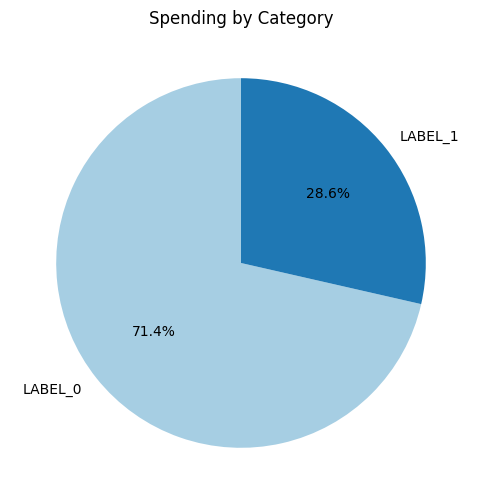

In [ ]:
import matplotlib.pyplot as plt

# Convert all expenses (negative values) to positive for visualization
data['Amount'] = data['Amount'].abs()

# Summarize spending by category
category_summary = data.groupby('Category')['Amount'].sum()

# Plot a pie chart
plt.figure(figsize=(8, 6))
category_summary.plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title("Spending by Category")
plt.ylabel("")  # Remove y-axis label
plt.show()


In [ ]:
classifier.model.save_pretrained("model")
classifier.tokenizer.save_pretrained("model")


('model/tokenizer_config.json',
 'model/special_tokens_map.json',
 'model/tokenizer.json')

In [54]:
!pip install onnxruntime


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.2 MB/s eta 0:00:00


In [55]:
!python -m transformers.onnx --model=Alireza1044/albert-base-v2-sst2 --feature=sequence-classification --opset=14 onnx_model/

2024-11-30 18:43:46.011991: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-30 18:43:46.076327: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-30 18:43:46.094593: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-30 18:43:48.530310: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Framework not requested. Using torch to export to ONNX.
Using framework PyTorch: 2.5.1+cu121
Validating ONNX model...
	-[✓] ONNX model output names match reference model ({'logits'})
	- Validating ONNX Model output "logits":
		-[✓] (3, 2) ma

In [56]:
!mo --input_model onnx_model/model.onnx --output_dir optimized_model


[ INFO ] MO command line tool is considered as the legacy conversion API as of OpenVINO 2023.2 release.
In 2025.0 MO command line tool and openvino.tools.mo.convert_model() will be removed. Please use OpenVINO Model Converter (OVC) or openvino.convert_model(). OVC represents a lightweight alternative of MO and provides simplified model conversion API. 
Find more information about transition from MO to OVC at https://docs.openvino.ai/2023.2/openvino_docs_OV_Converter_UG_prepare_model_convert_model_MO_OVC_transition.html
[ INFO ] Generated IR will be compressed to FP16. If you get lower accuracy, please consider disabling compression explicitly by adding argument --compress_to_fp16=False.
Find more information about compression to FP16 at https://docs.openvino.ai/2023.0/openvino_docs_MO_DG_FP16_Compression.html
[ SUCCESS ] Generated IR version 11 model.
[ SUCCESS ] XML file: /content/optimized_model/model.xml
[ SUCCESS ] BIN file: /content/optimized_model/model.bin


In [57]:
from openvino.runtime import Core

core = Core()
model = core.read_model("optimized_model/model.xml")
compiled_model = core.compile_model(model, "CPU")


In [60]:
!pip install openvino


In [62]:
import openvino
print(openvino.__version__)


2024.5.0-17288-7975fa5da0c-refs/pull/3856/head
